In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.utils import Sequence
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Dropout, LSTM, Reshape, LeakyReLU
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [ ]:
import tensorflow as tf
import keras.applications as keras_application

In [ ]:
from keras import backend as K
def recall(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Negative) = 실제 값이 1(Positive) 전체 
    count_true_positive_false_negative = K.sum(y_target_yn)

    # Recall =  (True Positive) / (True Positive + False Negative)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    recall = count_true_positive / (count_true_positive_false_negative + K.epsilon())

    # return a single tensor value
    return recall

def precision(y_target, y_pred):
    # clip(t, clip_value_min, clip_value_max) : clip_value_min~clip_value_max 이외 가장자리를 깎아 낸다
    # round : 반올림한다
    y_pred_yn = K.round(K.clip(y_pred, 0, 1)) # 예측값을 0(Negative) 또는 1(Positive)로 설정한다
    y_target_yn = K.round(K.clip(y_target, 0, 1)) # 실제값을 0(Negative) 또는 1(Positive)로 설정한다

    # True Positive는 실제 값과 예측 값이 모두 1(Positive)인 경우이다
    count_true_positive = K.sum(y_target_yn * y_pred_yn) 

    # (True Positive + False Positive) = 예측 값이 1(Positive) 전체
    count_true_positive_false_positive = K.sum(y_pred_yn)

    # Precision = (True Positive) / (True Positive + False Positive)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    precision = count_true_positive / (count_true_positive_false_positive + K.epsilon())

    # return a single tensor value
    return precision

def f1score(y_target, y_pred):
    _recall = recall(y_target, y_pred)
    _precision = precision(y_target, y_pred)
    # K.epsilon()는 'divide by zero error' 예방차원에서 작은 수를 더한다
    _f1score = ( 2 * _recall * _precision) / (_recall + _precision+ K.epsilon())
    
    # return a single tensor value
    return _f1score

In [ ]:
from keras.applications import mobilenet_v2

In [ ]:
img_row,img_col=224,224
temp_mobile = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3), pooling='max')

In [ ]:
#temp_mobile.summary()

In [ ]:
model=Sequential()

In [ ]:
model.add(temp_mobile)

In [ ]:
model.add(Dense(80, input_shape=(1280,)))

In [ ]:
model.add(LeakyReLU())

In [ ]:
model.add(Dropout(rate=0.5))

In [ ]:
model.add(Dense(5, input_shape=(80,)))

In [ ]:
model.add(LeakyReLU())

In [ ]:
model.add(Dropout(rate=0.5))

In [ ]:
model.add(Dense(2, activation='sigmoid'))

In [ ]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=SGD(learning_rate=0.00001), metrics=['acc', recall, precision, f1score])
#lr 스케줄링은 나중에model.fit의 callback안에 넣어주자.
#아래와 같이하면됨
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
#                              patience=5, min_lr=0.001)
#model.fit(X_train, Y_train, callbacks=[reduce_lr])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 dense (Dense)               (None, 80)                102480    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 80)                0         
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_1 (Dense)             (None, 5)                 405       
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 5)                 0         
                                                        

In [ ]:
#model.save('temp_ml5.h5')

In [ ]:
#sample_data
#test = tf.random.uniform([16,32,224*224,3],0,1)
#배치 크기 16쓰자

In [ ]:
import os
cur_path = os.getcwd()
cur_path+='/drive/Shareddrives/capstone_data_process2'
video_src = cur_path+'/mixed'

In [ ]:
import os
import cv2
cur_path = os.getcwd()
cur_path+='/drive/Shareddrives/capstone_data_process2'
all_data = pd.read_csv((cur_path+'/video_data_renew.csv'), names=['file_name', 'label'])
real_num = len(all_data[all_data['label'] == 1])
fake_num = len(all_data[all_data['label'] == 0])
print(real_num, fake_num , real_num+fake_num)
real_alls = all_data[all_data['label'] == 1]
#fake_sample = all_data[all_data['label'] == 0].sample(frac=0.11)
fake_sample = all_data[all_data['label'] == 0]
all_data_subset = pd.concat([real_alls, fake_sample])
display(all_data_subset)
data_train, data_test = train_test_split(all_data_subset, test_size = 0.2, random_state=2022)
data_train, data_validation = train_test_split(data_train, test_size=0.25, random_state=2022)
print(len(data_train), len(data_validation), len(data_test))
#print(len(data_train), len(data_test))

3020 5722 8742


,file_name,label
0,132838_050.avi,1
1,132838_051.avi,1
2,132838_056.avi,1
3,132838_055.avi,1
4,132838_053.avi,1
...,...,...
8737,169860_177877_2_0500.avi,0
8738,169860_177877_2_0460.avi,0
8739,169860_177877_2_0530.avi,0
8740,169860_177877_2_0540.avi,0


5244 1749 1749


In [ ]:
test_load = data_train.sample(n=16, replace=True)

In [ ]:
for i in test_load['file_name']:
  print(i)

170719_167917_2_1070.avi
138311_173521_2_1360.avi
156507_144.avi
07fc49d464acdc489fc1_bf13848f7f02f488b2e1_2_1030.avi
07fc49d464acdc489fc1_bf13848f7f02f488b2e1_2_1330.avi
170023_174509_2_0580.avi
0e105f8ec5146f9737d0_026f9b9514f28f37a3fd_2_1280.avi
159839_115.avi
140694_116.avi
170719_167917_2_0071.avi
163027_22983_2_0530.avi
156723_168153_2_0830.avi
170952_171887_2_0051.avi
145482_120.avi
170962_170878_2_1400.avi
169913_44219_2_0920.avi


In [ ]:
#test_video = cv2.VideoCapture(video_src+'/id32_id30_0000.avi')
#result_list = 0
#for i in range(0, 32):
#  if(type(result_list)==type(0)):
#    read_val = cv2.resize(test_video.read()[1], (224, 224))
#    read_val = read_val/255
#    result_list = read_val.reshape(1,224,224,3)
#  else:
#    read_val = cv2.resize(test_video.read()[1], (224, 224))
#    read_val = read_val/255
#    read_val = read_val.reshape(1,224,224,3)
#    result_list = np.concatenate([result_list, read_val])
#result_list=result_list.reshape(32,-1,3)

In [ ]:
#result_list.shape

In [ ]:
#test_load = data_train.sample(n=16, replace=True)
#return_data = 0
#for i in test_load['file_name']:
#  #영상 가져오기
#  test_video = cv2.VideoCapture(video_src+'/'+i)
#  result_list = 0
#  for i in range(0, 32):
#    if(type(result_list)==type(0)):
#      read_val = cv2.resize(test_video.read()[1], (224, 224))
#      read_val = read_val/255
#      result_list = read_val.reshape(1,224,224,3)
#    else:
#      read_val = cv2.resize(test_video.read()[1], (224, 224))
#      read_val = read_val/255
#      read_val = read_val.reshape(1,224,224,3)
#      result_list = np.concatenate([result_list, read_val])
#  result_list=result_list.reshape(32,-1,3)
#  #영상 가져오기 끝
#  if(type(return_data)==type(0)):
#    return_data = result_list.reshape(1, 32, -1, 3)
#  else:
#    return_data = np.concatenate([return_data, result_list.reshape(1, 32, -1, 3)])
#return_label = []
#for i in test_load['label']:
#  if(i==0):
#    target = np.array([1,0])
#  else:
#    target = np.array([0,1])
#  return_label.append(target)
#return_label = np.stack(return_label)

In [ ]:
#return_label

In [ ]:
#return_data.shape

In [ ]:
#len(data_train)

In [ ]:
data_train

,file_name,label
1685,110531_032.avi,1
5260,07fc49d464acdc489fc1_bf13848f7f02f488b2e1_2_07...,0
5672,0e105f8ec5146f9737d0_026f9b9514f28f37a3fd_2_04...,0
7763,170023_174509_2_0660.avi,0
6202,170930_169629_2_0500.avi,0
...,...,...
7218,169870_163491_2_0720.avi,0
6263,170930_169629_2_1110.avi,0
4516,156723_168153_2_0340.avi,0
6653,170962_170878_2_0270.avi,0


In [ ]:
class DataGenerator(Sequence):
    def __init__(self, dataset, batch_size):
      self.dataset = dataset
      self.batch_size = batch_size

    def __len__(self):
      return int(len(data_train) / self.batch_size)

    def __getitem__(self, index):
      test_load = self.dataset.sample(n=self.batch_size, replace=True, random_state=index)
      return_data = 0
      for i in test_load['file_name']:
        #영상 가져오기
        test_video = cv2.VideoCapture(video_src+'/'+i)
        result_list = 0
        for j in range(0, 16):
          if(type(result_list)==type(0)):
            try:
              read_val = cv2.resize(test_video.read()[1], (56, 56))
              read_val = read_val/255
              result_list = read_val.reshape(1,56,56,3)
            except:
              print(i)
          else:
            try:
              read_val = cv2.resize(test_video.read()[1], (56, 56))
              read_val = read_val/255
              read_val = read_val.reshape(1,56,56,3)
              result_list = np.concatenate([result_list, read_val])
            except:
              print(i)
        result_list=result_list.reshape(224,224,3)
        #영상 가져오기 끝
        if(type(return_data)==type(0)):
          return_data = result_list.reshape(1, 224, 224, 3)
        else:
          return_data = np.concatenate([return_data, result_list.reshape(1, 224, 224, 3)])
      return_label = []
      for i in test_load['label']:
        if(i==0):
          target = np.array([1,0])
        else:
          target = np.array([0,1])
        return_label.append(target)
      return_label = np.stack(return_label)
      return return_data, return_label

In [ ]:
train_datagen = DataGenerator(data_train, 16)

In [ ]:
validation_datagen = DataGenerator(data_test, 16)

In [ ]:
result = train_datagen.__getitem__(0)

In [ ]:
result[1].shape

(16, 2)

In [ ]:
os.getcwd()

'/content'

In [ ]:
#저장경로
#cur_path+='/content/drive/Shareddrives/capstone_data_process2'
store_tensor_model_path = '/content/drive/Shareddrives/capstone_data_process/temp'+'/trained_models/tensorflow'

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [ ]:
#callback 학습 시 활용할 함수들
#모델의 weight와 모델의 network구조를 저장함 //verbose=1: 저장했다고 출력해라 // save_best_only=True: 가장좋은거 하나 저장한다
modelcheckpoint=ModelCheckpoint(store_tensor_model_path+'/seventh_try_withaihub.h5', monitor='val_loss', verbose=1, save_best_only=True)
#lr스케줄링
#lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0000000001)
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)


In [ ]:
model.load_weights(store_tensor_model_path+'/fourth_try_size_to_56.h5')

In [ ]:
#aihub_test=DataGenerator(all_data_subset, 16)

In [ ]:
###keras eval
#loss_and_metrics = model.evaluate(aihub_test[0][0], aihub_test[0][1], batch_size=16)
#print('')
#print('loss_and_metrics : ' + str(loss_and_metrics)) 

In [ ]:
#모델을 저장했다가, 나중에 사용할 수 있도록 callback을 사용함, 저장은 로컬에 저장이됨_ 옆에 파일있는곳에 보임
history = model.fit(
    train_datagen,
    validation_data=validation_datagen, 
    epochs=20, # epochs 복수형으로 쓰기!
    callbacks=[modelcheckpoint, lr_schedule]
)

Epoch 1/20
327/327 [==============================] - ETA: 0s - loss: 1.2627 - acc: 0.6466 - recall: 0.6682 - precision: 0.6219 - f1score: 0.6428
Epoch 1: val_loss improved from inf to 0.89232, saving model to /content/drive/Shareddrives/capstone_data_process/temp/trained_models/tensorflow/seventh_try_withaihub.h5
327/327 [==============================] - 3317s 10s/step - loss: 1.2627 - acc: 0.6466 - recall: 0.6682 - precision: 0.6219 - f1score: 0.6428 - val_loss: 0.8923 - val_acc: 0.6531 - val_recall: 0.6519 - val_precision: 0.6524 - val_f1score: 0.6521 - lr: 1.0000e-05
Epoch 2/20
327/327 [==============================] - ETA: 0s - loss: 1.1773 - acc: 0.6422 - recall: 0.6627 - precision: 0.6156 - f1score: 0.6367
Epoch 2: val_loss improved from 0.89232 to 0.87754, saving model to /content/drive/Shareddrives/capstone_data_process/temp/trained_models/tensorflow/seventh_try_withaihub.h5
327/327 [==============================] - 157s 480ms/step - loss: 1.1773 - acc: 0.6422 - recall: 0.6

In [ ]:
#model2=Sequential()
#model2.add(temp_mobile)
#model2.add(Dense(80, input_shape=(1280,)))
#model2.add(LeakyReLU())
#model2.add(Dropout(rate=0.5))
#model2.add(Dense(5, input_shape=(80,)))
#model2.add(LeakyReLU())
#model2.add(Dropout(rate=0.5))
#model2.add(Dense(2, activation='sigmoid'))
#model2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=SGD(learning_rate=0.001), metrics=['acc', recall, precision, f1score])
#model2.summary()
#model2.load_weights(store_tensor_model_path+'/fourth_try_size_to_56.h5')
#

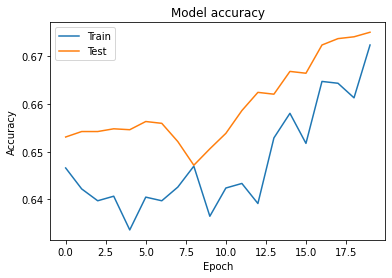

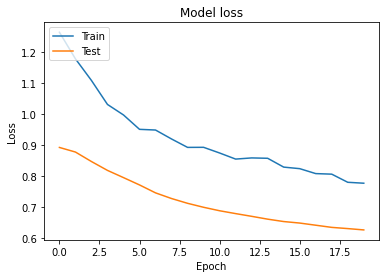

In [ ]:
##history = model.fit(x_train, y_train, validation_split=0.25, epochs=42, verbose=1)
##print(history.history)
#
# 6 훈련 과정 시각화 (정확도)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7 훈련 과정 시각화 (손실)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#모델을 저장했다가, 나중에 사용할 수 있도록 callback을 사용함, 저장은 로컬에 저장이됨_ 옆에 파일있는곳에 보임
history2 = model.fit(
    train_datagen,
    validation_data=validation_datagen, 
    epochs=100, # epochs 복수형으로 쓰기!
    callbacks=[modelcheckpoint, lr_schedule]
)

Epoch 1/100
327/327 [==============================] - ETA: 0s - loss: 0.7597 - acc: 0.6789 - recall: 0.7160 - precision: 0.6327 - f1score: 0.6699
Epoch 1: val_loss improved from 0.62714 to 0.62110, saving model to /content/drive/Shareddrives/capstone_data_process/temp/trained_models/tensorflow/seventh_try_withaihub.h5
327/327 [==============================] - 157s 479ms/step - loss: 0.7597 - acc: 0.6789 - recall: 0.7160 - precision: 0.6327 - f1score: 0.6699 - val_loss: 0.6211 - val_acc: 0.6799 - val_recall: 0.7403 - val_precision: 0.6587 - val_f1score: 0.6962 - lr: 1.0000e-05
Epoch 2/100
327/327 [==============================] - ETA: 0s - loss: 0.7622 - acc: 0.6797 - recall: 0.7232 - precision: 0.6379 - f1score: 0.6758
Epoch 2: val_loss improved from 0.62110 to 0.61483, saving model to /content/drive/Shareddrives/capstone_data_process/temp/trained_models/tensorflow/seventh_try_withaihub.h5
327/327 [==============================] - 159s 485ms/step - loss: 0.7622 - acc: 0.6797 - reca

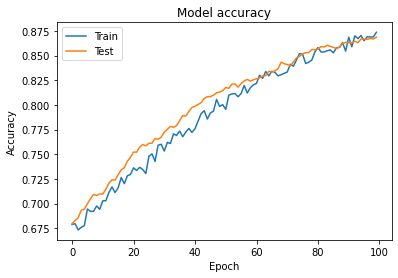

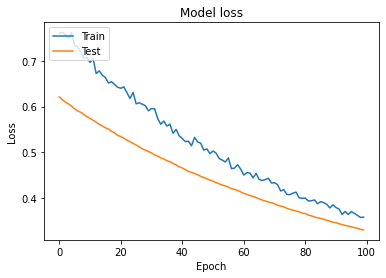

In [ ]:
##history = model.fit(x_train, y_train, validation_split=0.25, epochs=42, verbose=1)
##print(history.history)
#
# 6 훈련 과정 시각화 (정확도)
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7 훈련 과정 시각화 (손실)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#모델을 저장했다가, 나중에 사용할 수 있도록 callback을 사용함, 저장은 로컬에 저장이됨_ 옆에 파일있는곳에 보임
history3 = model.fit(
    train_datagen,
    validation_data=validation_datagen, 
    epochs=20, # epochs 복수형으로 쓰기!
    callbacks=[modelcheckpoint, lr_schedule]
)

Epoch 1/20
327/327 [==============================] - ETA: 0s - loss: 0.3515 - acc: 0.8729 - recall: 0.8813 - precision: 0.8174 - f1score: 0.8458
Epoch 1: val_loss improved from 0.33048 to 0.32856, saving model to /content/drive/Shareddrives/capstone_data_process/temp/trained_models/tensorflow/seventh_try_withaihub.h5
327/327 [==============================] - 155s 473ms/step - loss: 0.3515 - acc: 0.8729 - recall: 0.8813 - precision: 0.8174 - f1score: 0.8458 - val_loss: 0.3286 - val_acc: 0.8702 - val_recall: 0.9067 - val_precision: 0.8428 - val_f1score: 0.8726 - lr: 1.0000e-05
Epoch 2/20
327/327 [==============================] - ETA: 0s - loss: 0.3541 - acc: 0.8756 - recall: 0.8817 - precision: 0.8163 - f1score: 0.8456
Epoch 2: val_loss improved from 0.32856 to 0.32651, saving model to /content/drive/Shareddrives/capstone_data_process/temp/trained_models/tensorflow/seventh_try_withaihub.h5
327/327 [==============================] - 151s 461ms/step - loss: 0.3541 - acc: 0.8756 - recall

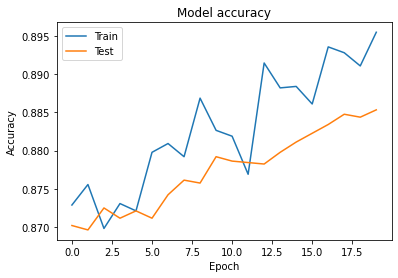

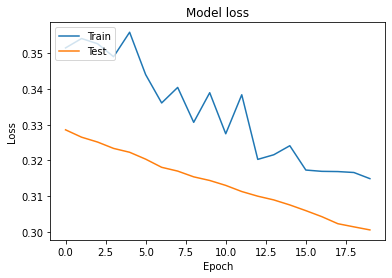

In [ ]:
##history = model.fit(x_train, y_train, validation_split=0.25, epochs=42, verbose=1)
##print(history.history)
#
# 6 훈련 과정 시각화 (정확도)
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7 훈련 과정 시각화 (손실)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#모델을 저장했다가, 나중에 사용할 수 있도록 callback을 사용함, 저장은 로컬에 저장이됨_ 옆에 파일있는곳에 보임
history4 = model.fit(
    train_datagen,
    validation_data=validation_datagen, 
    epochs=20, # epochs 복수형으로 쓰기!
    callbacks=[modelcheckpoint, lr_schedule]
)

Epoch 1/20
327/327 [==============================] - ETA: 0s - loss: 0.3193 - acc: 0.8928 - recall: 0.9037 - precision: 0.8388 - f1score: 0.8683
Epoch 1: val_loss improved from 0.30059 to 0.30013, saving model to /content/drive/Shareddrives/capstone_data_process/temp/trained_models/tensorflow/seventh_try_withaihub.h5
327/327 [==============================] - 150s 458ms/step - loss: 0.3193 - acc: 0.8928 - recall: 0.9037 - precision: 0.8388 - f1score: 0.8683 - val_loss: 0.3001 - val_acc: 0.8853 - val_recall: 0.9125 - val_precision: 0.8602 - val_f1score: 0.8846 - lr: 1.0000e-05
Epoch 2/20
327/327 [==============================] - ETA: 0s - loss: 0.3178 - acc: 0.8897 - recall: 0.8932 - precision: 0.8412 - f1score: 0.8644
Epoch 2: val_loss improved from 0.30013 to 0.29906, saving model to /content/drive/Shareddrives/capstone_data_process/temp/trained_models/tensorflow/seventh_try_withaihub.h5
327/327 [==============================] - 150s 460ms/step - loss: 0.3178 - acc: 0.8897 - recall

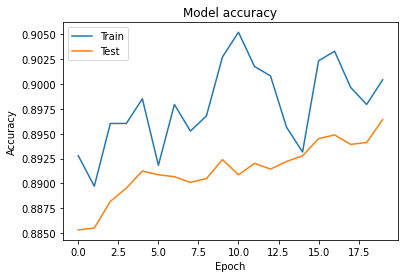

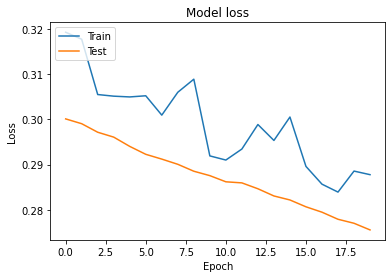

In [ ]:
##history = model.fit(x_train, y_train, validation_split=0.25, epochs=42, verbose=1)
##print(history.history)
#
# 6 훈련 과정 시각화 (정확도)
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7 훈련 과정 시각화 (손실)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
modelcheckpoint_2=ModelCheckpoint(store_tensor_model_path+'/seventh_try_withaihub_maybe_best_after.h5', monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
#모델을 저장했다가, 나중에 사용할 수 있도록 callback을 사용함, 저장은 로컬에 저장이됨_ 옆에 파일있는곳에 보임
history5 = model.fit(
    train_datagen,
    validation_data=validation_datagen, 
    epochs=20, # epochs 복수형으로 쓰기!
    callbacks=[modelcheckpoint_2, lr_schedule]
)

Epoch 1/20
327/327 [==============================] - ETA: 0s - loss: 0.2873 - acc: 0.9065 - recall: 0.9029 - precision: 0.8561 - f1score: 0.8771
Epoch 1: val_loss improved from inf to 0.27424, saving model to /content/drive/Shareddrives/capstone_data_process/temp/trained_models/tensorflow/seventh_try_withaihub_maybe_best_after.h5
327/327 [==============================] - 151s 463ms/step - loss: 0.2873 - acc: 0.9065 - recall: 0.9029 - precision: 0.8561 - f1score: 0.8771 - val_loss: 0.2742 - val_acc: 0.8962 - val_recall: 0.9201 - val_precision: 0.8727 - val_f1score: 0.8950 - lr: 1.0000e-05
Epoch 2/20
327/327 [==============================] - ETA: 0s - loss: 0.2851 - acc: 0.9046 - recall: 0.9115 - precision: 0.8577 - f1score: 0.8818
Epoch 2: val_loss improved from 0.27424 to 0.27284, saving model to /content/drive/Shareddrives/capstone_data_process/temp/trained_models/tensorflow/seventh_try_withaihub_maybe_best_after.h5
327/327 [==============================] - 152s 465ms/step - loss:

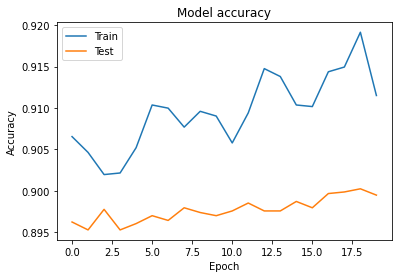

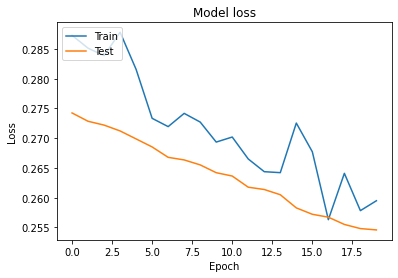

In [ ]:
##history = model.fit(x_train, y_train, validation_split=0.25, epochs=42, verbose=1)
##print(history.history)
#
# 6 훈련 과정 시각화 (정확도)
plt.plot(history5.history['acc'])
plt.plot(history5.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7 훈련 과정 시각화 (손실)
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Epoch 1/20
327/327 [==============================] - ETA: 0s - loss: 0.2590 - acc: 0.9157 - recall: 0.9163 - precision: 0.8688 - f1score: 0.8902
Epoch 1: val_loss improved from 0.25459 to 0.25405, saving model to /content/drive/Shareddrives/capstone_data_process/temp/trained_models/tensorflow/seventh_try_withaihub_maybe_best_after.h5
327/327 [==============================] - 155s 475ms/step - loss: 0.2590 - acc: 0.9157 - recall: 0.9163 - precision: 0.8688 - f1score: 0.8902 - val_loss: 0.2540 - val_acc: 0.8993 - val_recall: 0.9224 - val_precision: 0.8829 - val_f1score: 0.9016 - lr: 1.0000e-05
Epoch 2/20
327/327 [==============================] - ETA: 0s - loss: 0.2527 - acc: 0.9190 - recall: 0.9203 - precision: 0.8693 - f1score: 0.8923
Epoch 2: val_loss improved from 0.25405 to 0.25301, saving model to /content/drive/Shareddrives/capstone_data_process/temp/trained_models/tensorflow/seventh_try_withaihub_maybe_best_after.h5
327/327 [==============================] - 155s 473ms/step - l

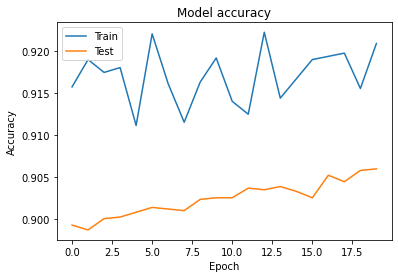

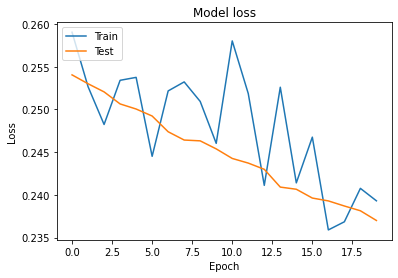

In [ ]:
#모델을 저장했다가, 나중에 사용할 수 있도록 callback을 사용함, 저장은 로컬에 저장이됨_ 옆에 파일있는곳에 보임
history6 = model.fit(
    train_datagen,
    validation_data=validation_datagen, 
    epochs=20, # epochs 복수형으로 쓰기!
    callbacks=[modelcheckpoint_2, lr_schedule]
)
##history = model.fit(x_train, y_train, validation_split=0.25, epochs=42, verbose=1)
##print(history.history)
#
# 6 훈련 과정 시각화 (정확도)
plt.plot(history6.history['acc'])
plt.plot(history6.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7 훈련 과정 시각화 (손실)
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
modelcheckpoint_3=ModelCheckpoint(store_tensor_model_path+'/seventh_try_withaihub_maybe_best_after_3.h5', monitor='val_loss', verbose=1, save_best_only=True)

Epoch 1/20
327/327 [==============================] - ETA: 0s - loss: 0.2264 - acc: 0.9300 - recall: 0.9266 - precision: 0.8843 - f1score: 0.9034
Epoch 1: val_loss improved from inf to 0.23563, saving model to /content/drive/Shareddrives/capstone_data_process/temp/trained_models/tensorflow/seventh_try_withaihub_maybe_best_after_3.h5
327/327 [==============================] - 158s 482ms/step - loss: 0.2264 - acc: 0.9300 - recall: 0.9266 - precision: 0.8843 - f1score: 0.9034 - val_loss: 0.2356 - val_acc: 0.9058 - val_recall: 0.9241 - val_precision: 0.8898 - val_f1score: 0.9061 - lr: 1.0000e-05
Epoch 2/20
327/327 [==============================] - ETA: 0s - loss: 0.2394 - acc: 0.9213 - recall: 0.9226 - precision: 0.8761 - f1score: 0.8970
Epoch 2: val_loss improved from 0.23563 to 0.23490, saving model to /content/drive/Shareddrives/capstone_data_process/temp/trained_models/tensorflow/seventh_try_withaihub_maybe_best_after_3.h5
327/327 [==============================] - 157s 479ms/step - l

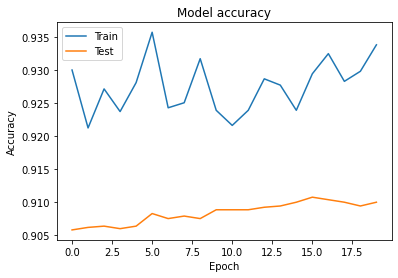

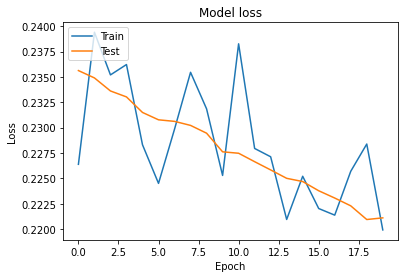

In [ ]:
#모델을 저장했다가, 나중에 사용할 수 있도록 callback을 사용함, 저장은 로컬에 저장이됨_ 옆에 파일있는곳에 보임
history7 = model.fit(
    train_datagen,
    validation_data=validation_datagen, 
    epochs=20, # epochs 복수형으로 쓰기!
    callbacks=[modelcheckpoint_3, lr_schedule]
)
##history = model.fit(x_train, y_train, validation_split=0.25, epochs=42, verbose=1)
##print(history.history)
#
# 6 훈련 과정 시각화 (정확도)
plt.plot(history7.history['acc'])
plt.plot(history7.history['val_acc'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 7 훈련 과정 시각화 (손실)
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()